In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

# pd.options.display.max_columns = None
# pd.options.display.max_rows = 50

In [2]:
boston_cal = pd.read_csv('boston_calendar.csv')
seattle_cal = pd.read_csv('seattle_calendar.csv')

In [3]:
print(boston_cal.shape)
boston_cal.head()

(1403425, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2020-04-14,f,$125.00,$125.00,28,1125
1,95453,2020-04-14,t,$179.00,$179.00,5,60
2,95453,2020-04-15,t,$179.00,$179.00,5,60
3,95453,2020-04-16,f,$179.00,$179.00,5,60
4,95453,2020-04-17,t,$199.00,$199.00,5,60


In [4]:
def change_price_to_float(df):
    """
    Change the listing price type from object to float, so we can operate on number type
    Args:
        df: the dataframe of Boston or Seattle listings
    Returns:
        df: the dataframe with price column changed to float type
    """
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    return df

boston_cal= change_price_to_float(boston_cal)
seattle_cal = change_price_to_float(seattle_cal)

In [5]:
boston_cal['month'] = boston_cal['date'].apply(lambda x: x[:7])
seattle_cal['month'] = seattle_cal['date'].apply(lambda x: x[:7])

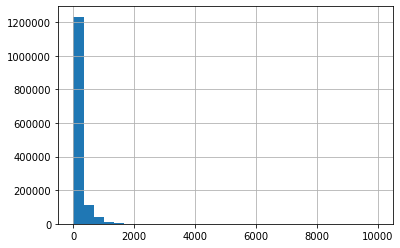

In [6]:
boston_cal['price'].hist(bins=30);

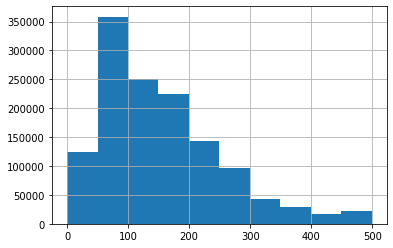

In [7]:
boston_cal[boston_cal['price'] < 500]['price'].hist();

In [8]:
boston_cal = boston_cal[(boston_cal['price'] < 500)]
seattle_cal = seattle_cal[(seattle_cal['price'] < 500)]

In [9]:
# because 

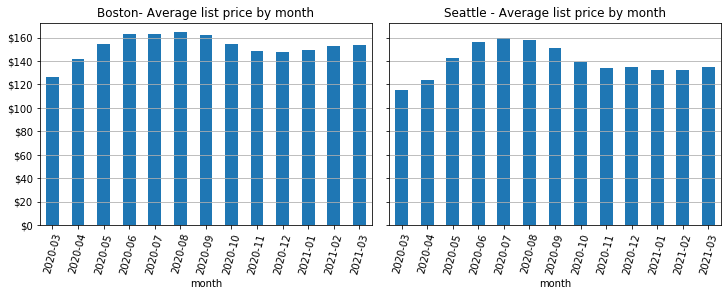

In [10]:
# average price by month
fig, axes = plt.subplots(1,2, constrained_layout=True, sharex=True, sharey=True)
fig.set_size_inches(10, 4)
axes[0].set_title('Boston- Average list price by month')
axes[1].set_title('Seattle - Average list price by month')
boston_cal[['month', 'price']].groupby('month').mean().plot(kind='bar', ax=axes[0], legend=None, rot=75)
seattle_cal[['month', 'price']].groupby('month').mean().plot(kind='bar', ax=axes[1], legend=None, rot=75)
axes[0].grid(axis='y')
axes[1].grid(axis='y')
axes[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('$%1.0f'))

In [11]:
# remove the begin and end months because there were less data collected compare with other months
boston_cal = boston_cal[~boston_cal['month'].isin([boston_cal['month'].min(), boston_cal['month'].max()])]
seattle_cal = seattle_cal[~seattle_cal['month'].isin([seattle_cal['month'].min(), seattle_cal['month'].max()])]

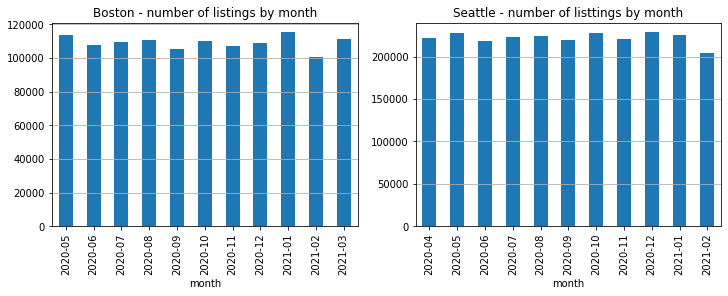

In [12]:
# number of listings by month
fig, axes = plt.subplots(1,2, constrained_layout=True)
fig.set_size_inches(10, 4)
axes[0].set_title('Boston - number of listings by month')
axes[1].set_title('Seattle - number of listtings by month')

boston_cal[['month', 'listing_id']].groupby('month').count().plot(kind='bar', ax=axes[0], legend=None);
seattle_cal[['month', 'listing_id']].groupby('month').count().plot(kind='bar', ax=axes[1], legend=None);
axes[0].grid(axis='y')
axes[1].grid(axis='y');